In [267]:
import pandas as pd
import matplotlib.pyplot as plt    #importing libraries

In [268]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [269]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [270]:
df.shape

(42, 2)

In [271]:
df.set_index('Quarter',inplace=True)   #setting index

In [272]:
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [273]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:xlabel='Quarter'>

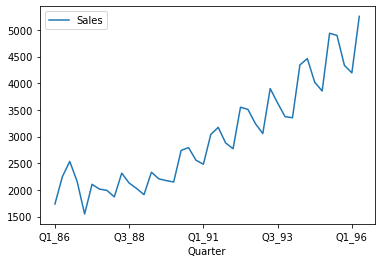

In [274]:
df.plot()     #it is having a positive trend

In [275]:
df['Smoothen_data']=df['Sales'].rolling(window=5).mean()  #smoothening the data

<AxesSubplot:xlabel='Quarter'>

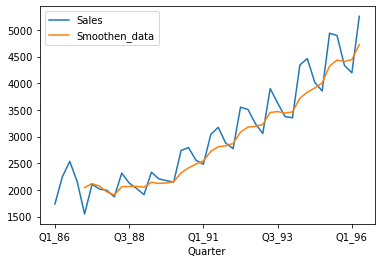

In [276]:
df.plot()

In [277]:
df['Sales_diff'] = df['Sales'].diff(periods=4)    #shifting and differencing

In [278]:
df

,Sales,Smoothen_data,Sales_diff
Quarter,,,
Q1_86,1734.827000,NaN,NaN
Q2_86,2244.960999,NaN,NaN
Q3_86,2533.804993,NaN,NaN
Q4_86,2154.962997,NaN,NaN
Q1_87,1547.818996,2043.274997,-187.008003
Q2_87,2104.411995,2117.191996,-140.549004
Q3_87,2014.362999,2071.072396,-519.441994
Q4_87,1991.746998,1962.660797,-163.216000
Q1_88,1869.049999,1905.478197,321.231003


In [279]:
from sklearn.metrics import mean_squared_error  #Naive error
import numpy as np

In [280]:
df_test = df[4:]

In [281]:
naive_error = mean_squared_error(df_test.Sales,df_test.Sales_diff)

In [282]:
naive_error

8628134.632772893

In [283]:
np.sqrt(naive_error)  #mse value is too much

2937.368657961219

# Performing dicky fuller test to check whether points are stationary.

In [284]:
from statsmodels.tsa.stattools import adfuller

In [285]:
result = adfuller(df['Sales'])

In [286]:
print('p-value' , result[1])

p-value 0.9966611673930905


In [287]:
result1 = (adfuller(df['Smoothen_data'].dropna()))

In [288]:
result1[1]

0.9979972021834532

In [289]:
result2 = (adfuller(df['Sales_diff'].dropna()))

In [290]:
result2[1]

0.09092533196680103

In [291]:
df['ModifiedSales'] = np.sqrt(df['Sales'])

In [292]:
df['ModifiedSales_diff']= df['ModifiedSales'].diff(periods=4)

In [293]:
result3 = adfuller(df['ModifiedSales_diff'].dropna())

In [294]:
result3[1]

0.00010028673046813148

In [295]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf    #plots to get info about p,d,f for arima

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


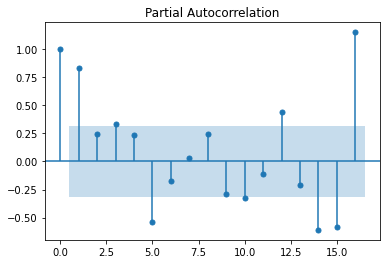

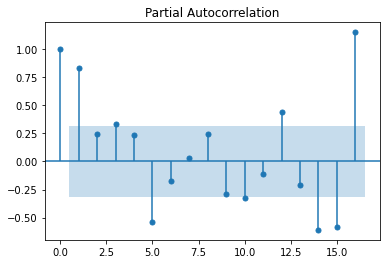

In [296]:
plot_pacf(df['ModifiedSales'][4:])

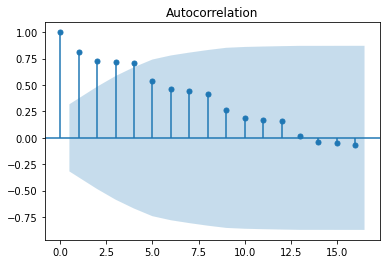

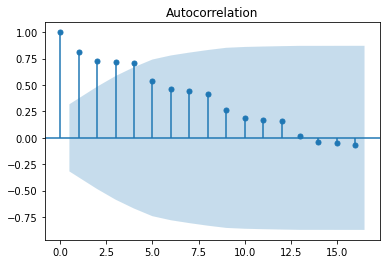

In [297]:
plot_acf(df['ModifiedSales'][4:])

In [298]:
df

,Sales,Smoothen_data,Sales_diff,ModifiedSales,ModifiedSales_diff
Quarter,,,,,
Q1_86,1734.827000,NaN,NaN,41.651254,NaN
Q2_86,2244.960999,NaN,NaN,47.381019,NaN
Q3_86,2533.804993,NaN,NaN,50.336915,NaN
Q4_86,2154.962997,NaN,NaN,46.421579,NaN
Q1_87,1547.818996,2043.274997,-187.008003,39.342331,-2.308924
Q2_87,2104.411995,2117.191996,-140.549004,45.873871,-1.507149
Q3_87,2014.362999,2071.072396,-519.441994,44.881655,-5.455259
Q4_87,1991.746998,1962.660797,-163.216000,44.628993,-1.792586
Q1_88,1869.049999,1905.478197,321.231003,43.232511,3.890180


# Splitting dataset

In [302]:
df_train=df.iloc[0:30,3]

In [304]:
df_train.size

30

In [305]:
df_test = df.iloc[30:,3]

In [314]:
df_test

Quarter
Q3_93    60.241182
Q4_93    58.077534
Q1_94    57.896459
Q2_94    65.893854
Q3_94    66.790718
Q4_94    63.379808
Q1_95    62.080593
Q2_95    70.256672
Q3_95    69.964277
Q4_95    65.825527
Q1_96    64.761099
Q2_96    72.477583
Name: ModifiedSales, dtype: float64

In [306]:
df_test.size

12

# Performing Arima

In [307]:
from statsmodels.tsa.arima_model import ARIMA

In [310]:
model = ARIMA(df['ModifiedSales'],order=(2,1,3))

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provi

In [311]:
fitted_model = model.fit()

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [312]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.ModifiedSales   No. Observations:                   41
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 -86.661
Method:                       css-mle   S.D. of innovations              1.811
Date:                Tue, 12 Oct 2021   AIC                            187.322
Time:                        13:14:16   BIC                            199.317
Sample:                             1   HQIC                           191.690
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6084      0.143      4.250      0.000       0.328       0.889
ar.L1.D.ModifiedSales    -0.0068      0.024     -0.286      0.775      -0.053       0.040
ar.L2.D.ModifiedSales    -0.9976      0.005   -210.529      0.000      -1.007      -0.988
ma.L1.D.ModifiedSales    -0.4186      0.126     -3.322      0.001      -0.666      -0.172
ma.L2.D.ModifiedSales     0.9364      0.168      5.565      0.000       0.607       1.266
ma.L3.D.ModifiedSales    -0.5370      0.150     -3.581      0.000      -0.831      -0.243
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0034           -1.0012j            1.0012           -0.2505
AR.2           -0.0034           +1.0012j            1.0012            0.2505
MA.1           -0.0592           -0.9982j            1.0000           -0.2594
MA.2           -0.0592           +0.9982j            1.0000            0.2594
MA.3            1.8621           -0.0000j            1.8621           -0.0000
-----------------------------------------------------------------------------
"""

In [315]:
df['forecast'] = fitted_model.predict(start='Q3_93',end='Q2_96',dynamic=True)

In [316]:
df.tail(5)

,Sales,Smoothen_data,Sales_diff,ModifiedSales,ModifiedSales_diff,forecast
Quarter,,,,,,
Q2_95,4936.0,4322.0,594.0,70.256672,4.362818,4.506147
Q3_95,4895.0,4432.6,434.0,69.964277,3.173559,1.275325
Q4_95,4333.0,4407.0,316.0,65.825527,2.445719,-3.284463
Q1_96,4194.0,4442.4,340.0,64.761099,2.680507,-0.030514
Q2_96,5253.0,4722.2,317.0,72.477583,2.220910,4.496321


<AxesSubplot:xlabel='Quarter'>

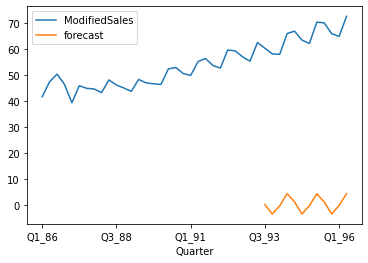

In [317]:
df[['ModifiedSales','forecast']].plot()

In [318]:
import statsmodels.api as sm

# Performing SARIMAX

In [320]:
models = sm.tsa.statespace.SARIMAX(df['ModifiedSales'],order=(2,1,3),seasonal_order=(2,1,3,4))

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [323]:
result = models.fit()

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [324]:
df['forecast']=result.predict(start='Q3_93',end='Q2_96',dynamic=True)

<AxesSubplot:xlabel='Quarter'>

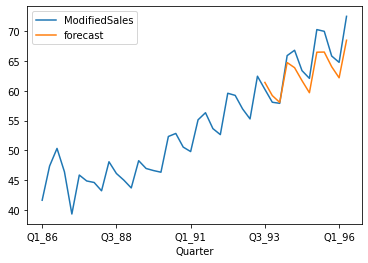

In [325]:
df[['ModifiedSales','forecast']].plot()   #CHecking trend of model by superimposing values of forecast on test_Set.

In [328]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     ModifiedSales   No. Observations:                   42
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 4)   Log Likelihood                 -66.411
Date:                           Tue, 12 Oct 2021   AIC                            154.823
Time:                                   13:27:51   BIC                            172.543
Sample:                                        0   HQIC                           161.070
                                            - 42                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4228      2.617      0.162      0.872      -4.707       5.552
ar.L2          0.5328      1.139      0.468      0.640      -1.701       2.766
ma.L1         -0.4559      2.894     -0.158      0.875      -6.128       5.217
ma.L2         -0.9138      1.299     -0.703      0.482      -3.460       1.632
ma.L3          0.3879      1.247      0.311      0.756      -2.056       2.832
ar.S.L4        0.2033      0.639      0.318      0.750      -1.050       1.456
ar.S.L8       -0.5293      0.678     -0.781      0.435      -1.858       0.799
ma.S.L4       -0.4169      1.603     -0.260      0.795      -3.559       2.725
ma.S.L8        0.8017      8.343      0.096      0.923     -15.550      17.153
ma.S.L12      -0.6603      5.915     -0.112      0.911     -12.254      10.933
sigma2         1.5951     13.798      0.116      0.908     -25.448      28.638
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.92   Prob(JB):                         0.09
Heteroskedasticity (H):               0.36   Skew:                             0.55
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""